<a href="https://colab.research.google.com/github/aetknaapen/assignments/blob/master/Python_assignment%20draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Assignment Applied Economic Analysis 1

**Annemarie van Oijen (213579) & Anne Knaapen (255349)**


##Abstract

In this assignment, we examine whether the requirements of the climate accord of Paris will be reached in the European Union with regard to CO2 emissions. First, we discuss the research question and the corresponding motivation. Second, we outline the dataset, and look at the development of CO2 emission levels, both on worldwide and EU level. We find that, on EU level, CO2 emissions have already been decreasing in the last decades. Next, we make both a naive and an ARIMA prediction about the future development of the EU CO2 emission levels. With ARIMA, we find that Lastly, we end with a conclusion and a discussion. **Misschien moeten we hier nog wat meer specifieke info aan toevoegen ipv een algemene opbouw van het paper? Dus meer de conclusie is enzo**

##Content



*   [Research question](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=r5UjBz4gJqi0)
*   [Motivation](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=6MliNdsULqPe)
* [Results](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=e97jtheoL-Fp)
* [Conclusion](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=GGlA_Tj6NXdx)
* [Discussion](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=4Op9jggvNbrN)





##Research question

The research question is: Will the requirements of the climate accord of Paris be reached in the European Union with regard to CO2 emission?

##Motivation

The last decades, the interest in and evidence of climate change has grown rapidly. All over the world, countries are taking action to reach a more green society with less polution. The Paris Agreement that was signed in 2015 was a big step towards a worldwide decrease of polution, a lower level of emissions, especially focussed towards CO2. Within this agreement of the  [United Nations]((https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement), countries set their own goals for reducing emissions. The [European Union's nationally determined contribution](https://ec.europa.eu/clima/policies/international/negotiations/paris_en) was to reduce greenhouse gas emissions by at least 40 percent in 2030, compared to 1990. As shown by the data, the CO2 emissions in the European Union are already decreasing. However, a 40 percent decrease compared to 1990 is not yet reached. In this paper we will research whether and if this will be reached by forecasting the CO2 emission based on past data.


##Results

**Answer**
The answer to the [research question](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=r5UjBz4gJqi0) is ......

**Prepare data**

First, we have to import the [Worldbank dataset](https://data.worldbank.org/) and search for the right indicator we want to use, CO2 emission.

In [1]:
!pip install wbdata

  Running setup.py bdist_wheel for wbdata ... - done
  Stored in directory: /root/.cache/pip/wheels/57/61/6a/3978e90cf2f9443b94ce56b4fa839850da9076e697be3a27e3
Successfully built wbdata


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wbdata as wb


In [3]:
wb.search_indicators("CO2 emission")

EN.ATM.CO2E.PC      	CO2 emissions (metric tons per capita)
EN.ATM.CO2E.LF.ZS   	CO2 emissions from liquid fuel consumption (% of total) 
EN.ATM.CO2E.LF.KT   	CO2 emissions from liquid fuel consumption (kt) 
EN.ATM.CO2E.KT      	CO2 emissions (kt)
EN.ATM.CO2E.KD.GD   	CO2 emissions (kg per 2010 US$ of GDP)
EN.ATM.CO2E.GL.KT   	CO2 emissions from gas flaring (thousand metric tons)
EN.ATM.CO2E.GF.ZS   	CO2 emissions from gaseous fuel consumption (% of total) 
EN.ATM.CO2E.GF.KT   	CO2 emissions from gaseous fuel consumption (kt) 
EN.ATM.CO2E.FF.ZS   	CO2 emissions from fossil-fuels (% of total)
EN.ATM.CO2E.FF.KT   	CO2 emissions from fossil-fuels, total (thousand metric tons)
EN.ATM.CO2E.CP.KT   	CO2 emissions from cement production (thousand metric tons)
EN.CO2.TRAN.ZS      	CO2 emissions from transport (% of total fuel combustion)
EN.CO2.OTHX.ZS      	CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)
EN.CO2.

Above, all the possible indicators for CO2 emission are stated. We use the variabele for CO2 emission in kilo ton because the climate accord requirements are stated this way.

**Descriptive statistics**

We now take a look at what the dataset looks like. We rename the indicator EN.ATM.CO2E.KT  into CO2 emission. Next, we display the first 10 and last 10 rows of the dataset, to get an idea what it looks like. 

In [4]:
indicators = {"EN.ATM.CO2E.KT ": "CO2_emission"}
df_wb = wb.get_dataframe(indicators, convert_date=True)
df_wb.reset_index(inplace = True)
df_wb.head(10)

,country,date,CO2_emission
0,Arab World,2017-01-01,NaN
1,Arab World,2016-01-01,NaN
2,Arab World,2015-01-01,NaN
3,Arab World,2014-01-01,1.895700e+06
4,Arab World,2013-01-01,1.775096e+06
5,Arab World,2012-01-01,1.796962e+06
6,Arab World,2011-01-01,1.655808e+06
7,Arab World,2010-01-01,1.645559e+06
8,Arab World,2009-01-01,1.581328e+06
9,Arab World,2008-01-01,1.491970e+06


In [5]:
df_wb.tail(10)

,country,date,CO2_emission
15302,Zimbabwe,1969-01-01,6750.947
15303,Zimbabwe,1968-01-01,6384.247
15304,Zimbabwe,1967-01-01,5298.815
15305,Zimbabwe,1966-01-01,6046.883
15306,Zimbabwe,1965-01-01,5214.474
15307,Zimbabwe,1964-01-01,4473.740
15308,Zimbabwe,1963-01-01,NaN
15309,Zimbabwe,1962-01-01,NaN
15310,Zimbabwe,1961-01-01,NaN
15311,Zimbabwe,1960-01-01,NaN


By looking at this overview, we can see that the dataset exists of data of all countries in the period 1960-2017. However, the dataset also includes empty cells (NaN).

**CO2 emission over time**

To see if and how CO2 emissions varies over time, we compare the dataset of 1990 with the one of 2014. This data is choosen because by looking more closely into the [dataset](https://databank.worldbank.org/data/reports.aspx?source=2&series=EN.ATM.CO2E.KT&country=) of the Worldbank, for this period many data is available. We merge the datasets based on 'inner', which means only countries with data for both periods are included in the new, merged dataset. We start by looking at the complet dataset. 

In [0]:
df_1990=df_wb[df_wb['date']=='1990-01-01']
df_2014=df_wb[df_wb['date']=='2014-01-01']

In [0]:
df_merged = pd.merge(df_1990, df_2014, on=['country'], suffixes=['_1990', '_2014'], how='inner')

We again take a look at the first 10 rows to see what the dataset looks like.

In [8]:
df_merged.head(10)

,country,date_1990,CO2_emission_1990,date_2014,CO2_emission_2014
0,Arab World,1990-01-01,6.717361e+05,2014-01-01,1.895700e+06
1,Caribbean small states,1990-01-01,3.159487e+04,2014-01-01,6.363712e+04
2,Central Europe and the Baltics,1990-01-01,9.983024e+05,2014-01-01,6.363858e+05
3,Early-demographic dividend,1990-01-01,2.851175e+06,2014-01-01,7.079255e+06
4,East Asia & Pacific,1990-01-01,4.703785e+06,2014-01-01,1.427211e+07
5,East Asia & Pacific (excluding high income),1990-01-01,2.864275e+06,2014-01-01,1.168863e+07
6,East Asia & Pacific (IDA & IBRD countries),1990-01-01,2.822276e+06,2014-01-01,1.164808e+07
7,Euro area,1990-01-01,NaN,2014-01-01,2.191542e+06
8,Europe & Central Asia,1990-01-01,NaN,2014-01-01,6.245992e+06
9,Europe & Central Asia (excluding high income),1990-01-01,NaN,2014-01-01,3.029861e+06


We describe the total dataset of both 1990 and 2014, to compare the averages of CO2 emission of these years. 

In [9]:
df_merged.describe()

,CO2_emission_1990,CO2_emission_2014
count,2.150000e+02,2.510000e+02
mean,7.294724e+05,1.273323e+06
std,2.475727e+06,4.224233e+06
min,7.334000e+00,1.100100e+01
25%,8.599115e+02,2.458724e+03
50%,1.000358e+04,2.223302e+04
75%,1.477123e+05,2.455680e+05
max,2.214940e+07,3.613828e+07


If we compare the mean of the CO2 emission of 1990 and 2014, we see that in 2014, the average level of CO2 emissions is higher. Next, we show this graphically.

Text(0, 0.5, 'CO2 emission in 2014')

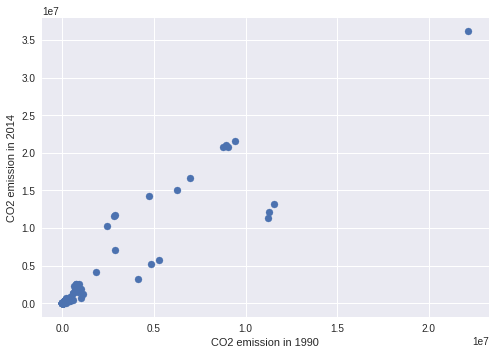

In [10]:
plt.scatter(df_merged['CO2_emission_1990'],df_merged['CO2_emission_2014'])
plt.xlabel('CO2 emission in 1990')
plt.ylabel('CO2 emission in 2014')

Next, we make this graph interactive, to show which point belongs to which country. It is important to remember that becaused we merged the dataset based on 'inner', only countries that have data in both periods are included. 

In [11]:
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool
output_notebook()

hover = HoverTool(tooltips=[
     ('country','@country'),
     ])

plot = figure(tools=[hover])
plot.circle('CO2_emission_1990','CO2_emission_2014',
    size=10, source=df_merged)
output_file('inequality.html')
show(plot)

Loading BokehJS ...

We showed that for the dataset as a whole, CO2 emission rises over time. The quantities have to be interpreted with care, for example in the upper right corner, there is a dot whith enormous CO2 emission. However, this is the CO2 emission level for the world as total. This has to do with the way the dataset of the Worldbank is build, it consists of both countries and groups of countries. 

To be able to make a prediction with regard to the climate accord, and to solve for the earlier mentioned difficulties with the dataset, we now isolate the variabele for the European Union. To meet our [research question](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=O6MUvjIMJqGR), we must check whether the emission level of 2030 will be 40 percent lower as compared to 1990. 
First, we start with selecting the data for the European Union and display the first and last 10 rows. 

In [0]:
indicators={"EN.ATM.CO2E.KT":"CO2_emission"}
countries=["EUU"]
df_wb_1=wb.get_dataframe(indicators, country=countries, convert_date=True)

In [13]:
df_wb_1.head(10)

,CO2_emission
date,
2017-01-01,NaN
2016-01-01,NaN
2015-01-01,NaN
2014-01-01,3241844.353
2013-01-01,3421472.348
2012-01-01,3494155.955
2011-01-01,3568090.009
2010-01-01,3709775.555
2009-01-01,3601566.052


In [14]:
df_wb_1.tail(10)

,CO2_emission
date,
1969-01-01,3.520601e+06
1968-01-01,3.317199e+06
1967-01-01,3.135495e+06
1966-01-01,3.066068e+06
1965-01-01,2.977006e+06
1964-01-01,2.879590e+06
1963-01-01,2.763661e+06
1962-01-01,2.587256e+06
1961-01-01,2.445946e+06


Text(0.5, 0, 'year')

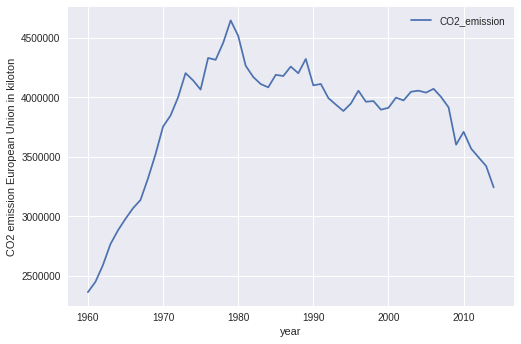

In [15]:
df_wb_1.plot()
plt.ylabel('CO2 emission European Union in kiloton')
plt.xlabel('year')

By looking at this graph, in contrast to the worldwide data, the CO2 emission level at the EU level is already falling. now we are going to predict whether the target will be reached. The decrease in CO2 emissions in the EU over the last decades can be explained by the fact that the Europe is a relatively high developed continent, compared to other continents like Africa or Asia. As a high developed continent, Europe has a large service sector and a small industrial sector. In contrast, developing continents like Asia still have a large industrial sector, which explains why CO2 emission levels are higher.  **Misschien kunnen we hier iets toevoegen dat wereld niveau alleen een gemiddelde is en dat EU niet de meest vervuilende industriële landen bevat maar meer de service sector omvat**

**Prediction**

We are going the predict the EU wide level of CO2 emission. We start we a naive prediction inspired by an [example](https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/) about predicting the level of sales of champagne.

In [0]:
import scipy as sc
import sklearn as sk
import statsmodels as st

The dataset needs to be adapted, it consists of empty cells for the period 2015-2017. This is solved by dropping the first three rows of the dataset.

In [0]:
df_wb_1.drop(df_wb_1.index[:3], inplace=True)

In [18]:
df_wb_1.head(10)

,CO2_emission
date,
2014-01-01,3241844.353
2013-01-01,3421472.348
2012-01-01,3494155.955
2011-01-01,3568090.009
2010-01-01,3709775.555
2009-01-01,3601566.052
2008-01-01,3915303.571
2007-01-01,4003410.580
2006-01-01,4071767.127


*Naive prediction*

Next, we start with preparing the dataset for the naive forecast. The naive forecast is a baseline prediction with which more elaborate predictions are compared with. This naive way of predicting uses the data of t-1 for the prediction of t+1 and predicts the average outcome. **Dit moet nog verder uitgelegd worden, deel staat in het voorbeeld van de champagne. Maar de data voorbereiding komt er op neer dat je de data verdeeld in een train set en een test set**

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt


X = df_wb_1.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

Now, we run a naive forecast, where the observation of the previous period is used for prediction in the next period. 

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt


X = df_wb_1.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):
	
	yhat = history[-1]
	predictions.append(yhat)
	
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=4202996.500, Expected=4258990
>Predicted=4258990.000, Expected=4179574
>Predicted=4179574.000, Expected=4189512
>Predicted=4189511.500, Expected=4084429
>Predicted=4084428.750, Expected=4111986
>Predicted=4111986.250, Expected=4171917
>Predicted=4171917.000, Expected=4266013
>Predicted=4266013.000, Expected=4518359
>Predicted=4518359.000, Expected=4647644
>Predicted=4647644.000, Expected=4457561
>Predicted=4457561.000, Expected=4315908
>Predicted=4315908.000, Expected=4331570
>Predicted=4331569.500, Expected=4065318
>Predicted=4065317.500, Expected=4142868
>Predicted=4142868.500, Expected=4203896
>Predicted=4203895.500, Expected=3999496
>Predicted=3999496.000, Expected=3846742
>Predicted=3846742.000, Expected=3753441
>Predicted=3753440.750, Expected=3520601
>Predicted=3520600.750, Expected=3317199
>Predicted=3317198.750, Expected=3135495
>Predicted=3135494.750, Expected=3066068
>Predicted=3066068.250, Expected=2977006
>Predicted=2977005.750, Expected=2879590
>Predicted=28795

The RMSE has a value of 139885.056, which means the model was wrong 139885.056 kilo ton CO2 emission in each prediction. 





*ARIMA prediction*

Now, we will use another [example](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b) to perform a less naive way of forcasting, ARIMA. This is a way of forecasting which controls for seasonality, noise and trend in data. However, since we work with yearly data, it is expected that the roll of this factors is not that big. 

**Meer uitleg over ARIMA hier.** Bijvoorbeeld dat je seasonal en niet seasonal variant hebt, gebruiken nu seasonal. Zie deze link https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3 

We start with finding the optimal set of parameters for our model. 

In [21]:
import warnings
import itertools
import statsmodels.api as sm
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')



/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_wb_1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue






ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1362.2344142947532
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2923.1529269386456
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1283.0118241730431
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1251.3170481866048
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:936.2275792940903
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2925.4184337206984
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1724.4881648172227
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1329.3813120240857
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1202.2371281742026
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2922.4446583425865
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1390.4749127645719
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1327.9530775585313
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:941.0967126985146
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2819.305710555847
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1085.4689112651556
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2674.2426922494105
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1109.7295104449195
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1087.387602585

The optimal ARIMA is the ARIMA with the lowest AIC value. Looking at the results, ARIMA(1, 1, 1)x(1, 1, 1, 12)12 has the lowest AIC value, namely 761.289...      
Optimal -> laagste AIC waarde. **Volgens mij is dat 761,28.... maar heb ff snel gekeken en die hieronder daar op aangepast** optimal parameters, will be fitted into the model. 

In [23]:
mod = sm.tsa.statespace.SARIMAX(df_wb_1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8640      0.216      4.004      0.000       0.441       1.287
ma.L1         -0.7030      0.337     -2.084      0.037      -1.364      -0.042
ar.S.L12      -0.6928      0.297     -2.330      0.020      -1.276      -0.110
ma.S.L12       0.0562      0.207      0.272      0.786      -0.349       0.461
sigma2      3.205e+10   2.94e-12   1.09e+22      0.000    3.21e+10    3.21e+10


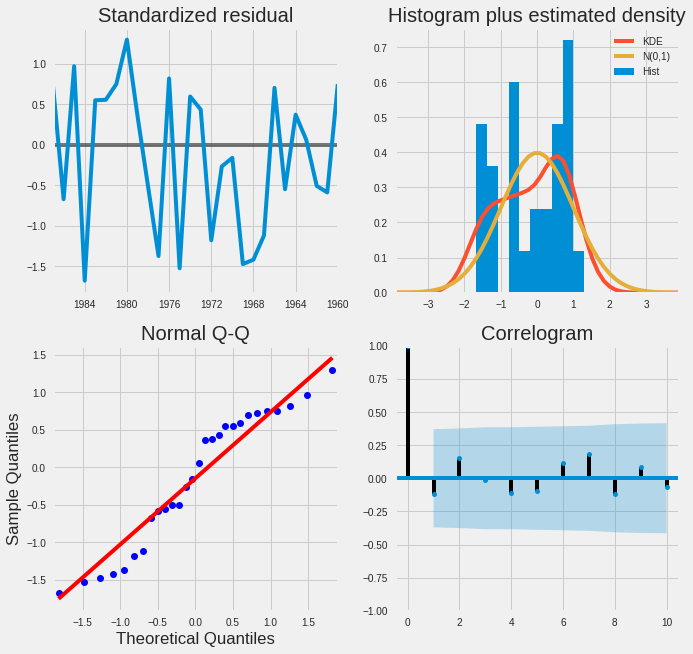

In [24]:
results.plot_diagnostics(figsize=(10, 10))
plt.show()

Looking at the results presented in the graphs above, we can see that the model residuals are relatively similar to a normal distribution. However, the graph in the up right shows that our model residuals are a little bit skewed to the right.

Moet een normale verdeling zijn met mean 0 en st dev 1., tabel rechts boven. Is niet helemaal, beetje skewed nog naar rechts. 

Mogelijk nog iets zeggen over tabel hierboven.

To validate our model, we have to split our dataset into two groups to check whether we have a good prediction model. If we look back to the [first rows of our EU dataset](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=3pUZklybn4-e), we can see data is available until 2014. The [first data](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=AbbeGHF17xX1) is available in 1960. Given this, we use the period 1960-1999 as dataset to develop the model, and we use 2010-2014 to validate it.


In [25]:
split_point = len(df_wb_1) - 5
dataset, validation = df_wb_1[0:split_point], df_wb_1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 50, Validation 5


**Starten met voorspellen in 2010, daar heb je ook nog gemeten data van dus aan de hand van periode 2010-2014 zie je eigenlijk hoe goed model is. **

In [26]:
pred = results.get_prediction(start=pd.to_datetime('2010-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = df_wb_1['1960':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('CO2 emission')
plt.legend()
plt.show()

ValueError: ignored

In [0]:
df_wb_1_forecasted = pred.predicted_mean
df_wb_1_truth = df_wb_1['2010-01-01':]
mse = ((df_wb_1_forecasted - df_wb_1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

**Prediction for the upcomming years**

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = df_wb_1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('CO2 emission')
plt.legend()
plt.show()

##Conclusion

##Discussion

Meer data zou beter zijn, bijvoorbeeld maandelijkse data, zeker als je kijkt naar de grafiek met de normale distributie en dergelijke. In deze sectie nog wat daarover uitleggen, je wil meer zoals in deze link staat https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3. Mogelijk dat maandelijkse data beter is, wordt in dat voorbeeld ook gedaan. Verwijzen naar voorbeeld met link. Maandelijks ook beter omdat we corrigeren voor seasonality maar dat is bij jaarlijkse data weinig aanwezig. 